Name : Gourav Verma<br>
Class : DSC540-T303<br>
Assignment : Project<br>
Topic : Data Wrangling on Mutual Funds - Final<br>

In [53]:
# Import necessary libraries

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Merge all the final 3 CSV files

In [2]:
# Function to read cleaned data from all sources into dataframe

def read_csv():
    
    # read cleaned CSV
    
    MF_csv = pd.read_csv('MF_csv.csv')
    MF_API = pd.read_csv('MF_API.csv')
    MF_Web = pd.read_csv('MF_Web.csv')
    
    return MF_csv, MF_API, MF_Web


In [3]:
# Read data from CSV files
MF_csv, MF_API, MF_Web = read_csv()


MF_csv = MF_csv.drop(['Unnamed: 0'], axis=1)
MF_API = MF_API.drop(['Unnamed: 0'], axis=1)
MF_Web = MF_Web.drop(['Unnamed: 0'], axis=1)
    

C:\Users\goura\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
# Info about data from CSV file
MF_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21750 entries, 0 to 21749
Data columns (total 45 columns):
Symbol                            21750 non-null object
fund_extended_name                21750 non-null object
fund_family                       21750 non-null object
net_assets                        21750 non-null float64
ytd_return                        21750 non-null float64
fund_yield                        21750 non-null float64
morningstar_rating                21750 non-null int64
inception_date                    21750 non-null object
investment                        21750 non-null object
f_size                            21750 non-null object
net_annual_expense_ratio_fund     21750 non-null float64
price_earnings                    21750 non-null float64
price_book                        21750 non-null float64
morningstar_return_rating         21750 non-null float64
fund_return_1month                21750 non-null float64
fund_return_3months               21750 non-

In [5]:
# Info about data from API

MF_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 9 columns):
Symbol               1505 non-null object
name_a               1505 non-null object
price                1505 non-null float64
changesPercentage    1505 non-null float64
change_a             1505 non-null float64
yearHigh             1505 non-null float64
yearLow              1505 non-null float64
priceAvg50           1505 non-null float64
priceAvg200          1505 non-null float64
dtypes: float64(7), object(2)
memory usage: 105.9+ KB


In [6]:
# Info about data from Web

MF_Web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 6 columns):
Symbol         1239 non-null object
Name           1239 non-null object
Change         1239 non-null float64
%_Change       1239 non-null float64
50_Day_Avg     1239 non-null float64
200_Day_Avg    1239 non-null float64
dtypes: float64(4), object(2)
memory usage: 58.2+ KB


In [7]:
# Merge API and Web data, inner join to get only matching Symbols

df1 = pd.merge(MF_API, MF_Web, how='inner', on='Symbol')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 1230
Data columns (total 14 columns):
Symbol               1231 non-null object
name_a               1231 non-null object
price                1231 non-null float64
changesPercentage    1231 non-null float64
change_a             1231 non-null float64
yearHigh             1231 non-null float64
yearLow              1231 non-null float64
priceAvg50           1231 non-null float64
priceAvg200          1231 non-null float64
Name                 1231 non-null object
Change               1231 non-null float64
%_Change             1231 non-null float64
50_Day_Avg           1231 non-null float64
200_Day_Avg          1231 non-null float64
dtypes: float64(11), object(3)
memory usage: 144.3+ KB


In [8]:
# Merge API/Web and CSV data, inner join to get only matching Symbols

MF_all = pd.merge(df1, MF_csv, how='inner', on='Symbol')
MF_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1212
Data columns (total 58 columns):
Symbol                            1213 non-null object
name_a                            1213 non-null object
price                             1213 non-null float64
changesPercentage                 1213 non-null float64
change_a                          1213 non-null float64
yearHigh                          1213 non-null float64
yearLow                           1213 non-null float64
priceAvg50                        1213 non-null float64
priceAvg200                       1213 non-null float64
Name                              1213 non-null object
Change                            1213 non-null float64
%_Change                          1213 non-null float64
50_Day_Avg                        1213 non-null float64
200_Day_Avg                       1213 non-null float64
fund_extended_name                1213 non-null object
fund_family                       1213 non-null object
ne

In [9]:
# Write Final Dataframe into CSV file

MF_all.to_csv('MF_all.csv')

### Load the final CSV file into Database

**I have installed DB Browser(SQLite) on my system and created database DSC540_Prj.db**<br>
**Inside this database a table 'Mutual_Fund' has been created by loading the final CSV file 'MF_all.CSV'**

In [10]:
# Connect to database

con = sqlite3.connect('DSC540_Prj.db')

In [14]:
# Display the content of database

cursor = con.execute('select * from Mutual_Fund')
rows = cursor.fetchall()

In [12]:
type(cursor)

sqlite3.Cursor

In [15]:
# Load the data from table into Panda's dataframe

MF_db = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
MF_db.head()

,field1,Symbol,name_a,price,changesPercentage,change_a,yearHigh,yearLow,priceAvg50,priceAvg200,...,energy,industrials,technology,morningstar_risk_rating,fund_alpha_3years,fund_beta_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_treynor_ratio_3years
0,0,NSCCX,Nuveen NWQ Small-Cap Value Fund Class C,29.86,-2.74,-0.840000,40.75,21.67,27.172941,33.193237,...,9.67,14.53,16.39,4.0,-9.56,1.29,66.88,16.89,0.35,3.63
1,1,APGCX,AB Large Cap Growth Fund Class C,43.79,0.34,0.150000,43.72,31.46,40.761470,40.264560,...,0.00,6.61,31.78,3.0,2.92,0.98,85.33,11.40,1.29,15.50
2,2,ASERX,American Century Select Fund R Class,80.44,0.24,0.190000,84.03,58.01,75.318240,75.707130,...,1.35,12.31,32.27,3.0,0.52,1.07,89.52,12.14,1.10,12.70
3,3,SCMGX,Sands Capital Global Growth Fund Institutional...,29.18,0.72,0.209999,29.04,20.63,26.806765,26.546324,...,0.00,1.80,27.56,5.0,8.55,1.13,69.84,14.26,1.16,14.97
4,4,PRDSX,T. Rowe Price QM U.S. Small-Cap Growth Equity ...,37.34,-1.09,-0.410000,41.51,25.90,33.964413,36.666620,...,2.43,19.82,20.93,2.0,-1.19,1.24,86.59,14.32,0.96,11.00


### Plot Visualizations

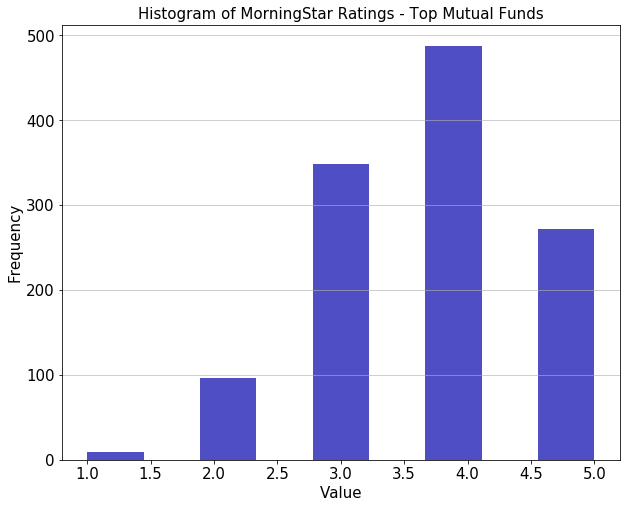

In [28]:
# Plot distribution of MorningStar ratings of top mutual funds.

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=MF_db['morningstar_rating'], bins=9, color='#0504aa',alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram of MorningStar Ratings - Top Mutual Funds',fontsize=15)
plt.show()



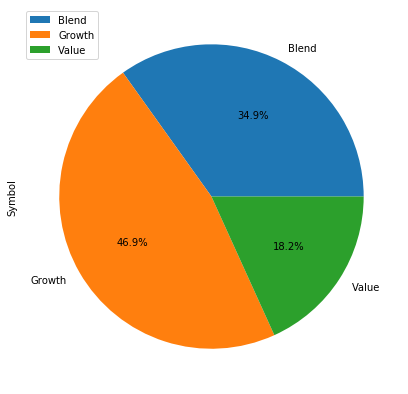

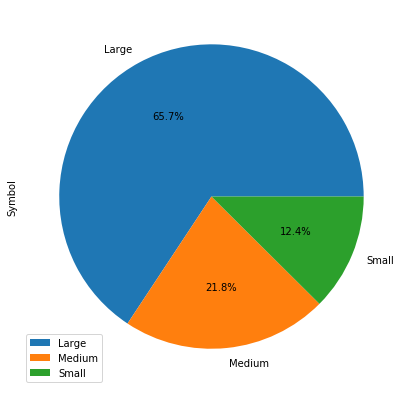

In [49]:
# PLot pie chart of Investment Type and Fund Type.

MF_db.groupby(['investment']).count().plot(kind='pie', y='Symbol', figsize=(12,7), autopct='%1.1f%%')
MF_db.groupby(['f_size']).count().plot(kind='pie', y='Symbol', figsize=(12,7), autopct='%1.1f%%')

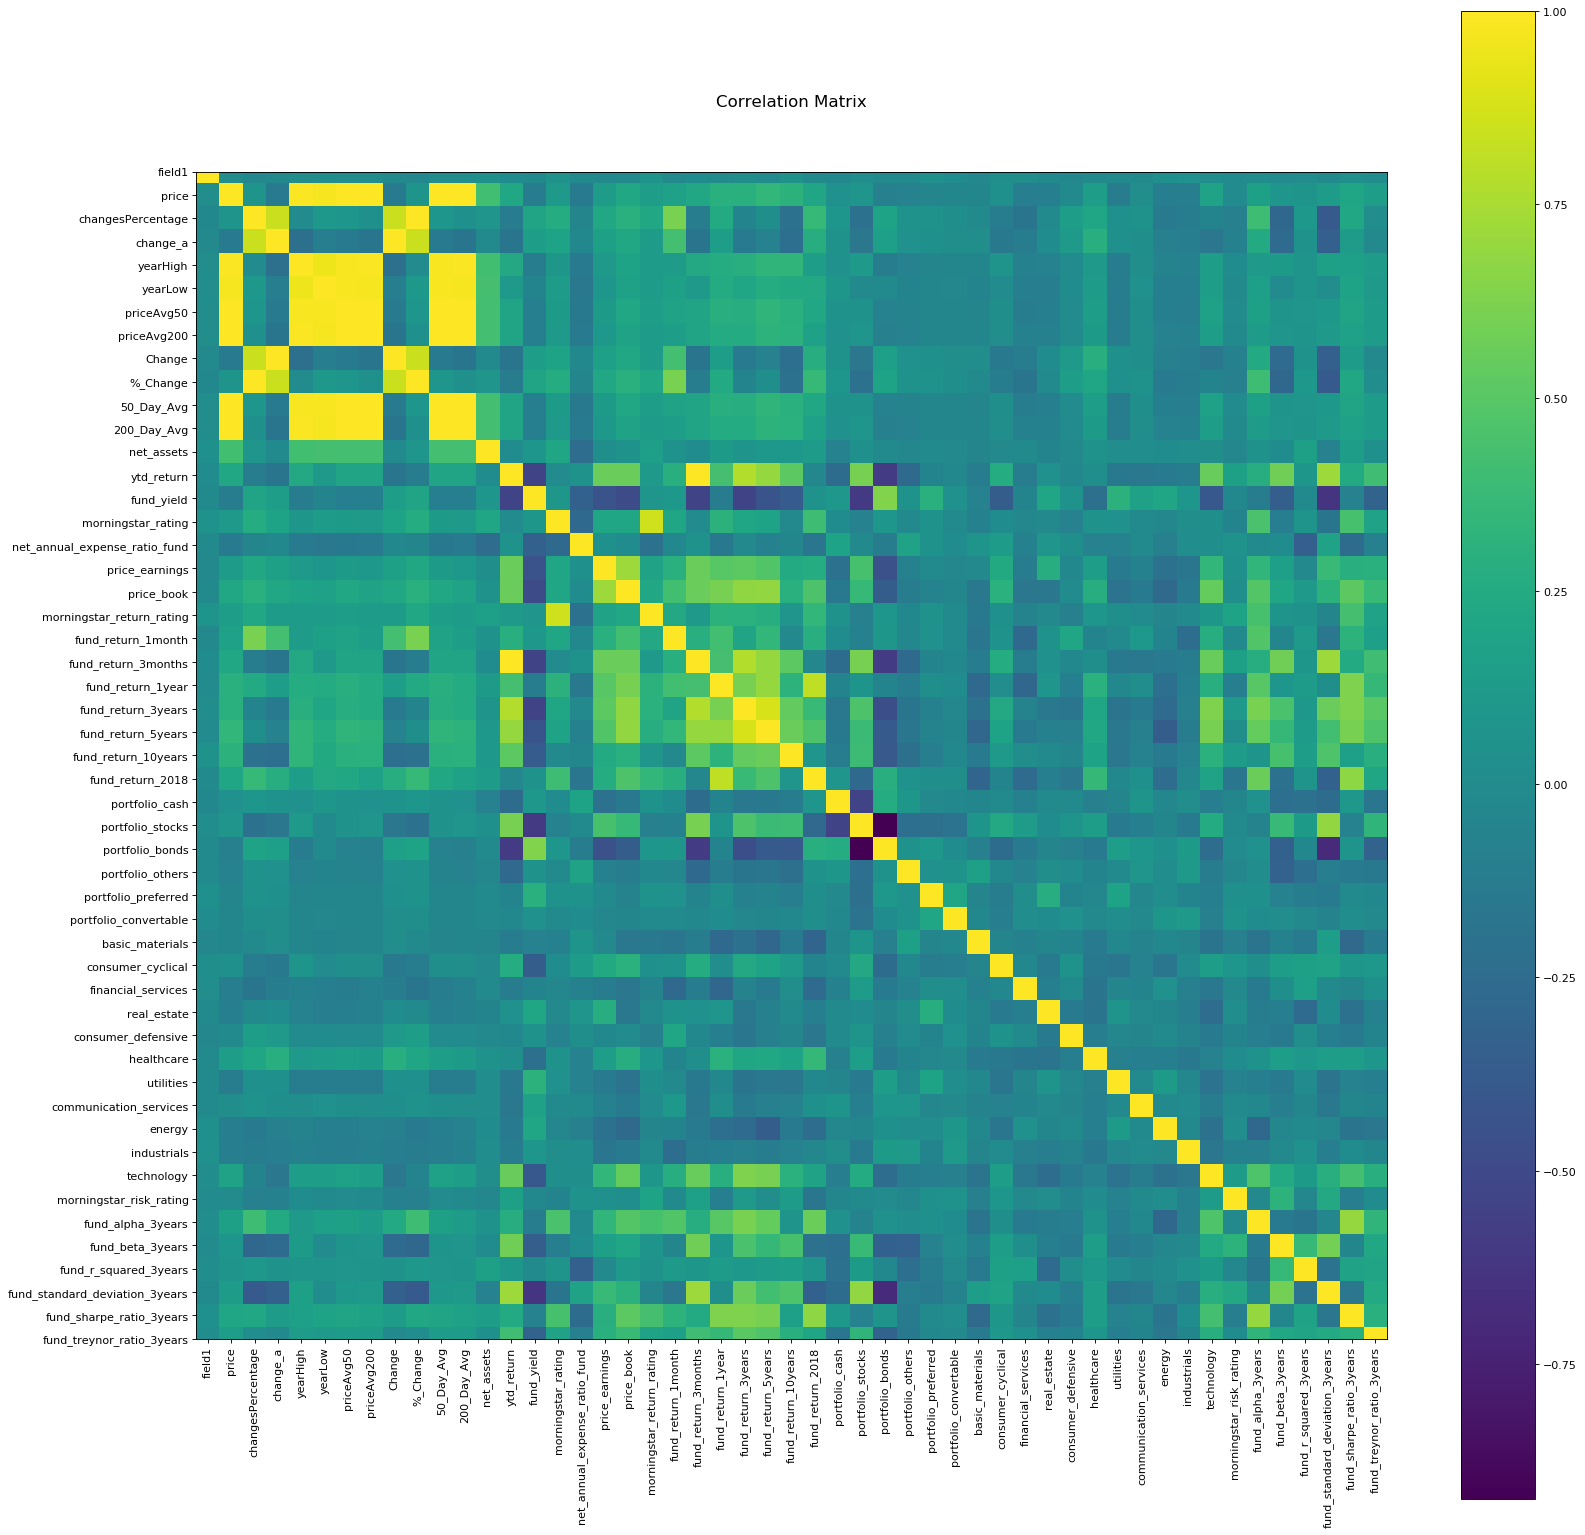

In [56]:
# Plot correlation matrix for the columns in dataframe

corr = MF_db.corr()
plt.figure(num=None, figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

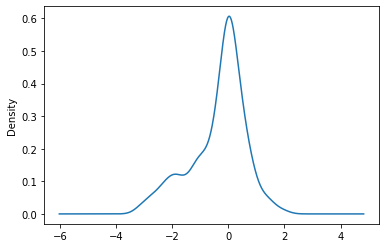

In [72]:
# Density plot of % change

MF_db['changesPercentage'].plot.kde()

In [76]:
# Select investment sector variables

Sector_df = MF_db.filter(['basic_materials', 'consumer_cyclical', 'financial_services', 
                    'real_estate', 'consumer_defensive', 'healthcare', 'utilities', 'communication_services', 
                    'energy', 'industrials', 'technology'], axis=1)

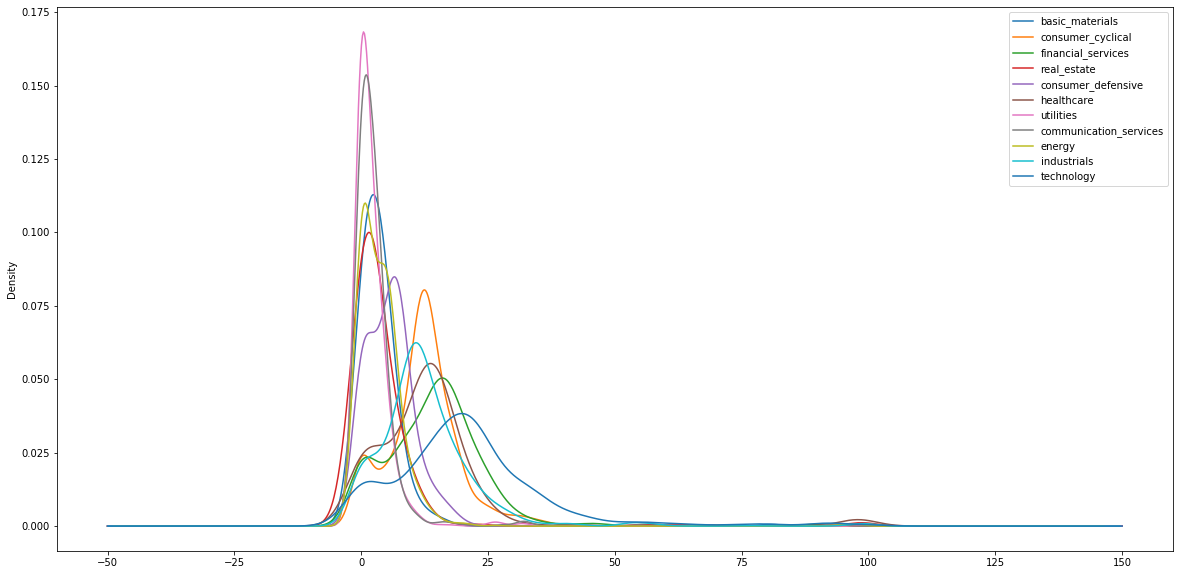

In [93]:
# Plot the density of different investment sectors

Sector_df.plot.kde(figsize=(20,10))